# Exploring the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("dfinal2.csv", delimiter = ";")
df.head(5)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.000000,51.000000,8.0,322.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.190574,25.538934,8.3,138.0,E
2,2,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,68.190574,25.538934,8.3,138.0,E
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.000000,73.000000,8.3,709.0,E
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.000000,73.000000,8.0,192.0,E


In [2]:
# Returns basic information on all columns
print(df.info())
print("----------------------")
# Returns missings values NAN
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16730 non-null  int64  
 1   Name          16730 non-null  object 
 2   Platform      16730 non-null  object 
 3   Year          16730 non-null  float64
 4   Genre         16730 non-null  object 
 5   Publisher     16730 non-null  object 
 6   NA_Sales      16730 non-null  float64
 7   EU_Sales      16730 non-null  float64
 8   JP_Sales      16730 non-null  float64
 9   Other_Sales   16730 non-null  float64
 10  Global_Sales  16730 non-null  float64
 11  Critic_Score  16730 non-null  float64
 12  Critic_Count  16730 non-null  float64
 13  User_Score    16730 non-null  float64
 14  User_Count    16730 non-null  float64
 15  Rating        10688 non-null  object 
dtypes: float64(10), int64(1), object(5)
memory usage: 2.0+ MB
None
----------------------
Unnamed: 0         0
Name 

In [3]:
# Dropping Unnecessary columns
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Dropping Unnecessary columns
df = df.drop('Rating', axis=1)


In [5]:
# Scaling the "User_Score" column by multiplying it by 10

df['User_Score'] = df['User_Score'] * 10



In [6]:
# Update Dataset
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.000000,51.000000,80.0,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.190574,25.538934,83.0,138.0
2,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,68.190574,25.538934,83.0,138.0
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.000000,73.000000,83.0,709.0
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.000000,73.000000,80.0,192.0


## Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X: Features, y: Target, test_size: 30% for testing, random_state: for reproducibility

# Print the shapes of the training and testing sets
print(" Train set shape:",X_train.shape)
print("Test set shape:",X_test.shape)

 Train set shape: (11711, 13)
Test set shape: (5019, 13)


# Data Visualization

In [22]:

# Import necessary libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio


In [28]:

fig = px.histogram(
    df,
    x='Year',
    y='Global_Sales',
    title='Evolution of Global Sales Over the Years',
    labels={'Year': 'Year', 'Global_Sales': 'Global Sales (in millions)'}
)
fig.show("png")

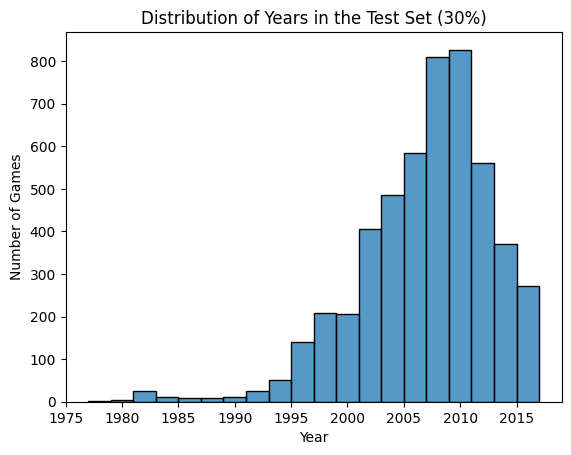

In [ ]:
# Create a histogram of the years in the test set
sns.histplot(data=X_test, x='Year', bins=20)

# Set the title of the histogram
plt.title("Distribution of Years in the Test Set (30%)")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

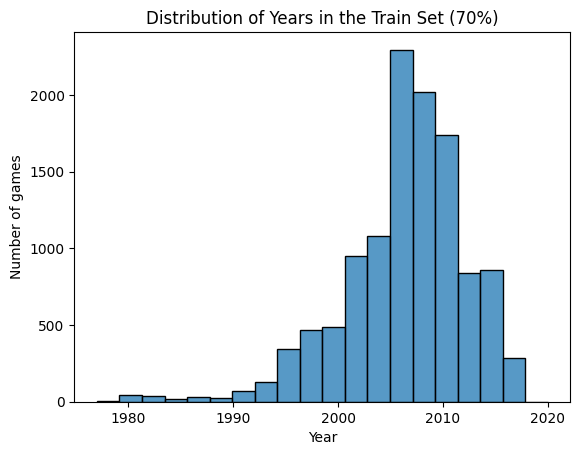

In [ ]:
# Plotting the train set over the years
sns.histplot(data=X_train, x='Year', bins=20)
plt.title("Distribution of Years in the Train Set (70%)")
plt.xlabel("Year")
plt.ylabel("Number of games")
plt.show()

#Data Transformation

## Hashing Encoding

In [ ]:
!pip install category_encoders
import category_encoders as ce


# Create a HashingEncoder object
encoder = ce.HashingEncoder(cols=['Name', 'Platform', 'Genre', 'Publisher'], n_components=4)

# Apply Hashing Encoding : Fit the encoder and transform the training data
X_train_hash = encoder.fit_transform(X_train)

# Transform the test data using the fitted encoder
X_test_hash = encoder.transform(X_test)

# Encoding Data
X_train_encoded = pd.DataFrame(X_train_hash, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_hash, index=X_test.index)

# Print the first few rows of the encoded data
print(X_train_encoded.head())
print(X_test_encoded.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00
       col_0  col_1  col_2  col_3    Year  NA_Sales  EU_Sales  JP_Sales  \
15816      0      1      1      2  2016.0      0.00      0.00      0.02   
1458       0      3      1      0  1998.0      0.94      0.07      1.05   
11942      0      1      1      2  2004.0      0.07      0.02      0.00   
10810      0      3      1      0  2004.0      0.07      0.05      0.00   
10843      0      2      1      1  2000.0      0.07      0.05      0.00   

       Other_Sales  Critic_Score  Critic_Count  User_Score  User_Count  
15816         0.00     72.992157     35.711111   76.538371  385.848414  
1458          0.04     81.000000     17.000000   89.000000   89.000000  
11942         0.00     70.758799     40.787785   71.664646  386.557884  
10810         0.02     48.000000     20.000000   67.000000   13.000000  
10843         0.01     73.283019     25.043019   71.328063   71.453333  
       col_0  col_1  col_2  col_3

In [ ]:
# Update Encoded Data Shape
print(X_train_encoded.shape)
print(X_test_encoded.shape)
print(X_train.info())
print(X_test.info())

(11711, 13)
(5019, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 11711 entries, 15816 to 15795
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          11711 non-null  object 
 1   Platform      11711 non-null  object 
 2   Year          11711 non-null  float64
 3   Genre         11711 non-null  object 
 4   Publisher     11711 non-null  object 
 5   NA_Sales      11711 non-null  float64
 6   EU_Sales      11711 non-null  float64
 7   JP_Sales      11711 non-null  float64
 8   Other_Sales   11711 non-null  float64
 9   Critic_Score  11711 non-null  float64
 10  Critic_Count  11711 non-null  float64
 11  User_Score    11711 non-null  float64
 12  User_Count    11711 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 12773 to 16591
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------      

## Feature Engineering

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler


# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Feature Selection using SelectKBest

k = 4  # Number of top features to select
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Display the number of original and selected features
print("Original number of features :", X_train_encoded.shape[1])
print("Reduced number of features:", X_train_selected.shape[1])

# Apply the feature selection transformation to the test set
X_test_selected = selector.transform(X_test_scaled)

# Display the selected columns
selected_columns = X_train_encoded.columns[selector.get_support()]
print("Selected columns :", selected_columns)

Original number of features : 13
Reduced number of features: 4
Selected columns : Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


# Few Models

## KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)# Create a KNN regressor with 5 neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print(f"MSE (KNeighborsRegressor): {mse_lr}")
print(f"R^2 (KNeighborsRegressor): {r2_lr}")
print(f"MAE (KNeighborsRegressor): {mae_lr}")

MSE (KNeighborsRegressor): 0.7097872500498106
R^2 (KNeighborsRegressor): 0.7905749324136376
MAE (KNeighborsRegressor): 0.16775054791791194


**The KNeighborsRegressor** model demonstrates a good performance in predicting Global_Sales. The relatively low MSE and MAE, along with a high R^2 value, suggest that the model is able to capture a significant portion of the variance in the target variable and make reasonably accurate predictions.

### KNN Visualization


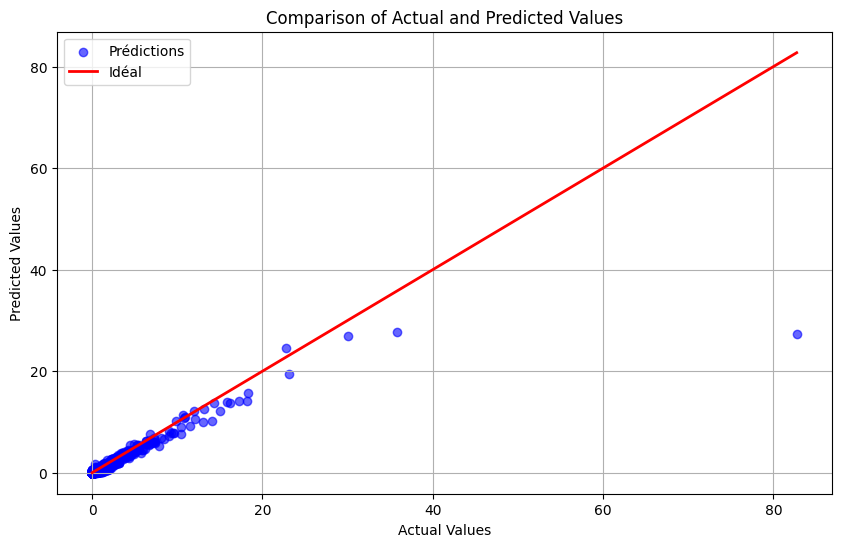

In [ ]:
import numpy as np

# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prédictions', alpha=0.6)

# Scatter plot of actual vs. predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Idéal')
plt.xlabel('Actual Values') # Set the x-axis label
plt.ylabel('Predicted Values') # Set the x-axis label
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Regressor

In [ ]:
# Loop through each column in the training data (X_train)
for column in X_train.columns:
     # Check if the column's data type is 'object' (usually string or categorical)
    if X_train[column].dtype == 'object':
         # If it's an 'object' type, print a message indicating potential problems
        print(f"Potentially problematic values in column '{column}':")
         # Print unique values in the column that contain non-numeric or non-period characters
        print(X_train[column][X_train[column].str.contains('[^0-9.]', na=False)].unique())

Potentially problematic values in column 'Name':
['Black Rose Valkyrie' 'Parasite Eve' "Tom Clancy's Classic Trilogy" ...
 "Cruis'n" 'Petz Hamsterz Superstarz' 'Mount & Blade Collection']
Potentially problematic values in column 'Platform':
['PS4' 'PS' 'XB' 'PS2' 'XOne' 'Wii' 'DS' 'X360' 'WiiU' 'GBA' 'N64' 'SNES'
 'SAT' 'PSP' 'PSV' 'GC' 'PC' "('WiiU',)" '3DS' 'PS3' 'NES' 'GB' 'DC'
 "('PS4',)" 'NG' 'SCD' 'GEN' "('PSV',)" "('PC',)" 'WS' "('XOne',)" '3DO'
 'TG16' "('3DS',)"]
Potentially problematic values in column 'Genre':
['Role-Playing' 'Shooter' 'Misc' 'Sports' 'Racing' 'Platform' 'Adventure'
 'Puzzle' 'Action' 'Fighting' 'Simulation' 'Strategy']
Potentially problematic values in column 'Publisher':
['Idea Factory' 'SquareSoft' 'Ubisoft' 'Gathering of Developers'
 'Midway Games' 'Codemasters' 'Sony Computer Entertainment'
 'Kadokawa Shoten' 'Rising Star Games' 'Electronic Arts' 'Activision'
 'THQ' 'Eidos Interactive' 'Square Enix' 'Namco Bandai Games' 'Sega'
 'Konami Digital Entertain

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object with a random state for reproducibility
regressor = RandomForestRegressor(random_state=42)

# Train the model using the encoded training data
regressor.fit(X_train_encoded, y_train)

# Evaluate the model's performance on the training and test sets
print("Training Score: ", regressor.score(X_train_encoded,y_train))
print("Test Score: ", regressor.score(X_test_encoded,y_test))

Training Score:  0.9949872455309478
Test Score:  0.8441884019436745


**The RandomForestRegressor** model exhibits a good level of performance with a fairly high test accuracy, achieving an R² score of 0.84. This means the model is successfully capturing a significant portion of the variance in Global Sales. However, there is a notable gap between the high training score (0.99) and the test score, suggesting some overfitting. While the model generalizes well to unseen data, fine-tuning parameters to minimize overfitting might further improve performance.

### Model metrics

In [ ]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculate predictions for the test and training sets
y_pred_random_forest = regressor.predict(X_test_encoded)
y_pred_random_forest_train = regressor.predict(X_train_encoded)

# Calculate evaluation metrics for the test set
mae_random_forest_test = mean_absolute_error(y_test,y_pred_random_forest)
mse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=True)
rmse_random_forest_test = mean_squared_error(y_test,y_pred_random_forest,squared=False)


# Create a DataFrame to store and compare metrics
data = {'MAE test': [mae_random_forest_test],
        'MSE test': [mse_random_forest_test],
        'RMSE test': [rmse_random_forest_test]}

# Create the DataFrame with 'Random Forest' as the index
dfmétriques = pd.DataFrame(data, index = ['Random Forest'])

dfmétriques.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



,MAE test,MSE test,RMSE test
Random Forest,0.037946,0.52808,0.726691


### GridSearch

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.metrics import r2_score  # For model evaluation

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)  # Create a Random Forest regressor with a random state for reproducibility

# Configure the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Perform the grid search on the training data
grid_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test_encoded)

# Calculate performance metrics on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the performance metrics
print(f"MSE (Test): {mse}")
print(f"R^2 (Test): {r2}")

# MSE (Test): 0.6577555064676661
# R^2 (Test): 0.8059270698542047

MSE (Test): 0.6577555064676661
R^2 (Test): 0.8059270698542047


## K-Means

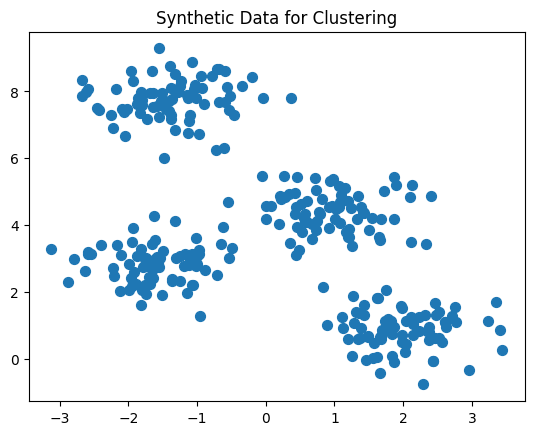

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plotting the data for clustering
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data for Clustering")
plt.show()

We can already see the 4 clusters very distinctly

In [ ]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels
y_kmeans = kmeans.predict(X)

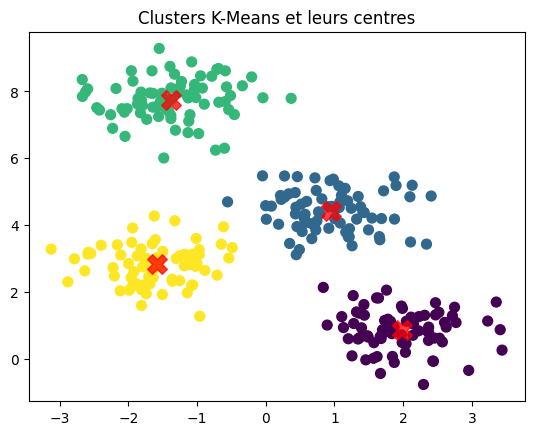

In [ ]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Display the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusters K-Means et leurs centres")
plt.show()

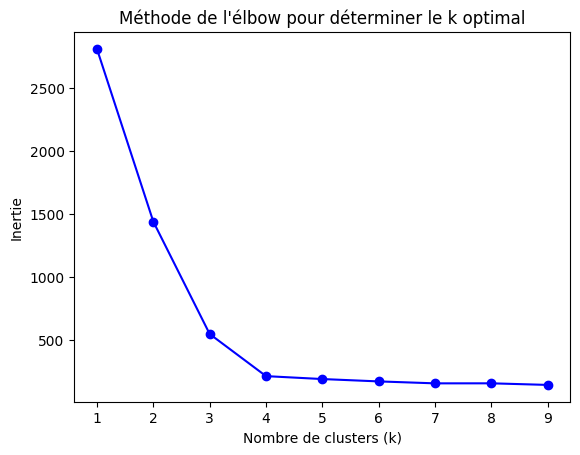

In [ ]:
# Calculate inertia for different numbers of clusters
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve (elbow method)
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode de l'élbow pour déterminer le k optimal")
plt.show()

The choice of 4 clusters seems correct because the elbow is forming very well.

## Top features

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.000000,51.000000,80.0,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.190574,25.538934,83.0,138.0
2,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,68.190574,25.538934,83.0,138.0
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.000000,73.000000,83.0,709.0
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.000000,73.000000,80.0,192.0


In [ ]:
from scipy import stats

<Axes: >

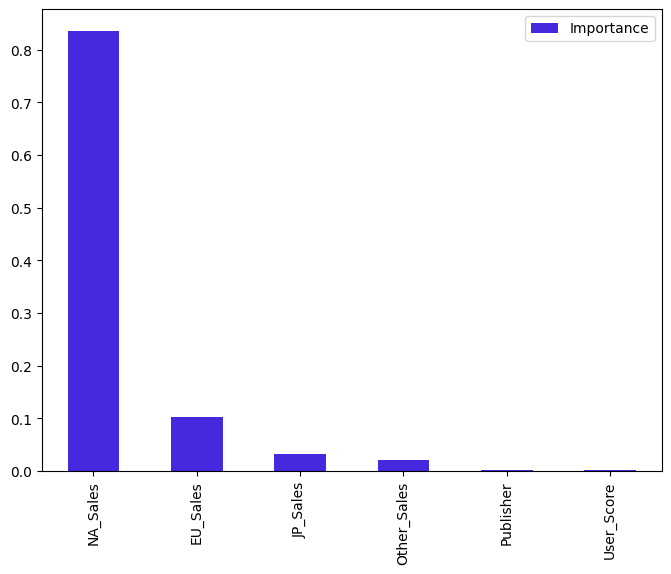

In [ ]:
# Create a DataFrame to store feature importances
feat_importances = pd.DataFrame(
    regressor.feature_importances_, index=X_train.columns, columns=["Importance"]
)
# Use feature importances from the trained regressor, index by feature names, and name the column "Importance"

# Sort the feature importances in descending order
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Sort the DataFrame by the "Importance" column in descending order, modifying it in place

# Select the top 6 most important features
top_6_features = feat_importances.nlargest(6, 'Importance')
# Get the 6 rows with the largest "Importance" values

# Create a bar plot to visualize the top features
top_6_features.plot(
    kind='bar', figsize=(8, 6), color='#4529DE'
)

## Visualizing Relationships with Global Sales

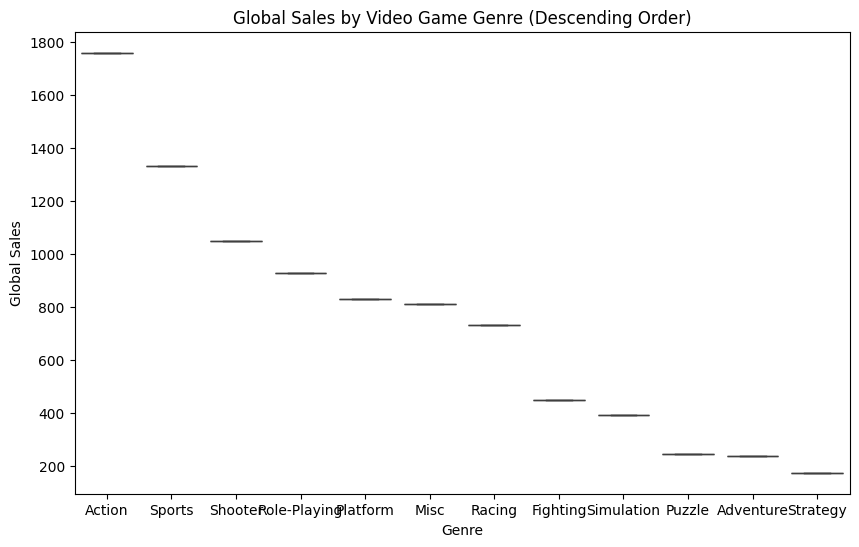

In [ ]:
# Calculate total sales by genre
genre_sales = (
    df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=genre_sales.index, y=genre_sales.values)
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global Sales by Video Game Genre (Descending Order)')
plt.show()

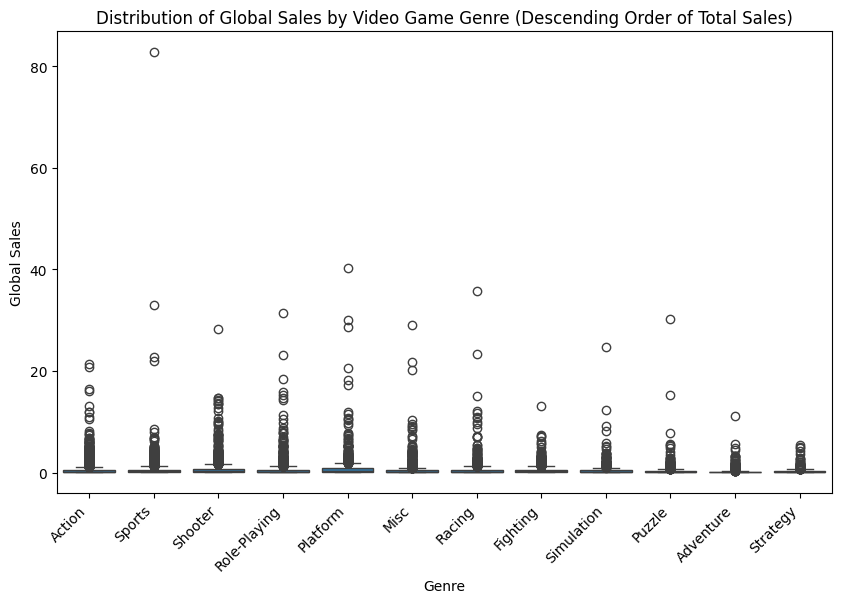

In [ ]:
# Sort genres by median sales (actually by total sales in this case)
genre_order = (
    df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).index
)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Genre', y='Global_Sales', data=df, order=genre_order
)

plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title(
    'Distribution of Global Sales by Video Game Genre (Descending Order of Total Sales)'
)
plt.xticks(rotation=45, ha='right')
plt.show()

# Analysis of Variance (ANOVA)

In [ ]:
import scipy.stats as stats # Import the stats module from scipy

# Perform ANOVA test to check for differences in sales between genres
groups = df.groupby('Genre')['Global_Sales'].apply(list)

# Conduct the one-way ANOVA test
fvalue, pvalue = stats.f_oneway(*groups)

# Print the results
print(f"F-value: {fvalue}, p-value: {pvalue}")

F-value: 18.41943176722908, p-value: 3.7205206529054735e-37


The extremely low p-value allows us to conclude that there is a significant difference between the average sales of different video game genres.

In [ ]:
# Get feature importances from the Random Forest model
importances = regressor.feature_importances_
feature_names = X_train_encoded.columns
indices = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature Importances:")
for f in range(X_train_encoded.shape[1]):
    print(
        "%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]])
    )

Feature Importances:
1. NA_Sales (0.835324)
2. EU_Sales (0.101726)
3. JP_Sales (0.033054)
4. Other_Sales (0.020151)
5. Year (0.002084)
6. User_Score (0.001635)
7. User_Count (0.001545)
8. Critic_Score (0.001374)
9. Critic_Count (0.000923)
10. col_2 (0.000725)
11. col_0 (0.000692)
12. col_1 (0.000419)
13. col_3 (0.000346)


Besides sales from other continents, the most relevant feature that influences video game sales is the release year, followed by the user score

# Student’s T-Test

In [ ]:
# Extract data for the two groups (Action and Strategy genres)
action_sales = df[df['Genre'] == 'Action']['Global_Sales']
strategy_sales = df[df['Genre'] == 'Strategy']['Global_Sales']

# Perform the Student's t-test
t_statistic, p_value = stats.ttest_ind(
    action_sales, strategy_sales, equal_var=False
)


# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 9.574433848169388
p-value: 2.5582196539131508e-21


the t-statistic and p-value, we can conclude that there is a statistically significant difference in global sales between 'Action' and 'Strategy' video games. The results suggest that 'Action' games tend to have significantly higher global sales compared to 'Strategy' games.

## Do Critics Matter? The Surprising Influence of User Reviews on Game Sales

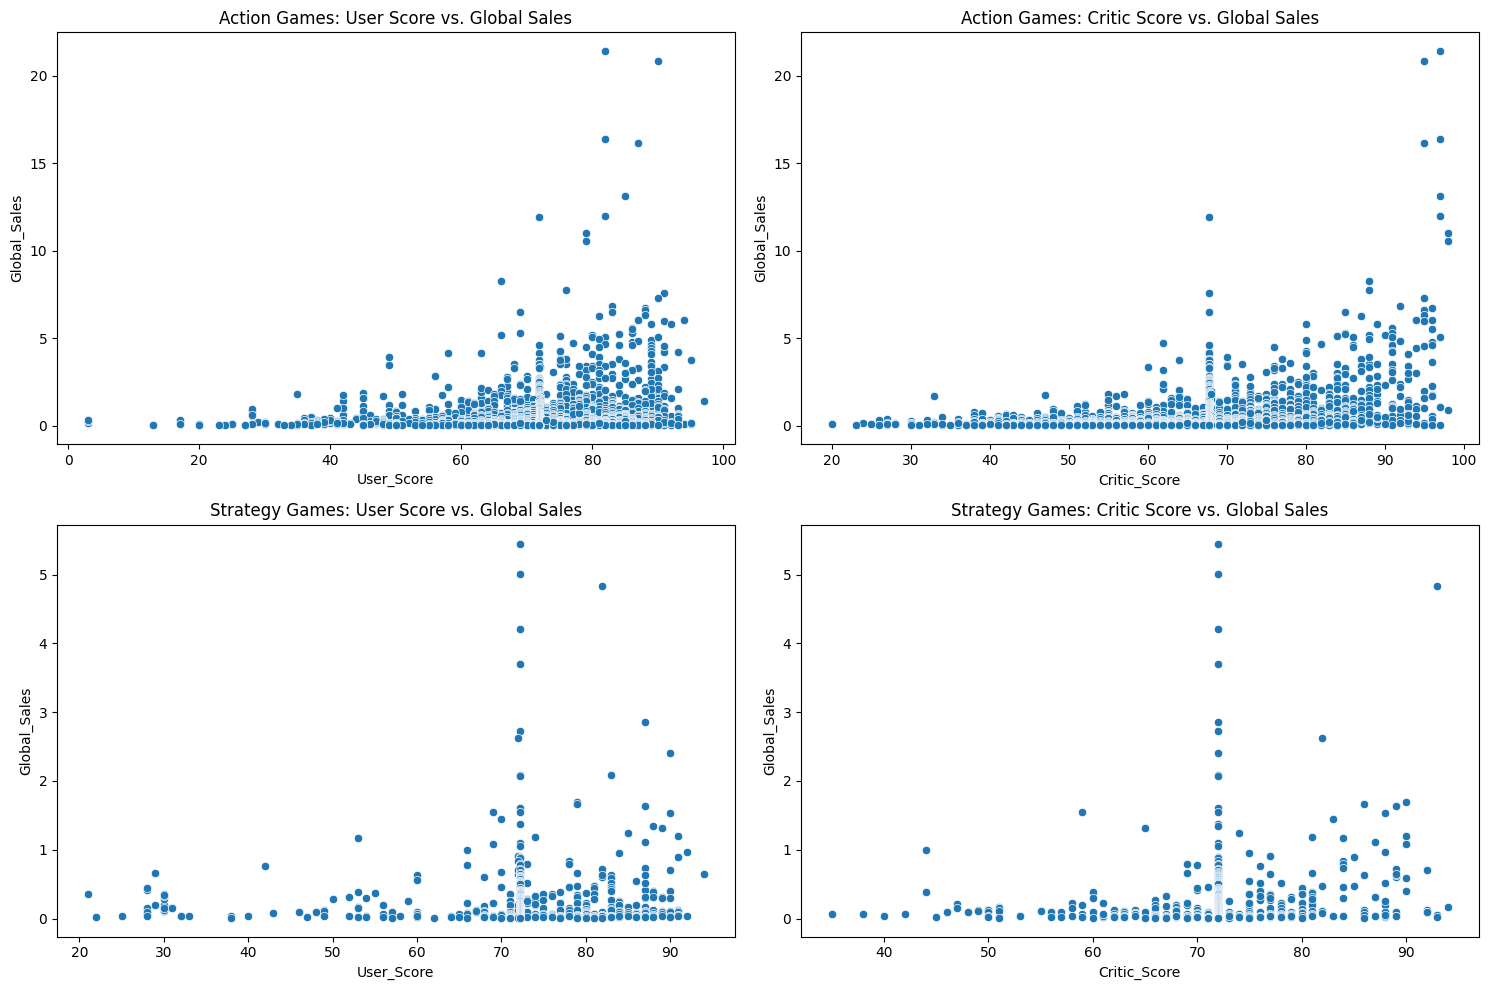

Correlations for Action Games:
              User_Score  Critic_Score  Global_Sales
User_Score      1.000000      0.553818      0.176567
Critic_Score    0.553818      1.000000      0.334458
Global_Sales    0.176567      0.334458      1.000000

Correlations for Strategy Games:
              User_Score  Critic_Score  Global_Sales
User_Score      1.000000      0.408492      0.076587
Critic_Score    0.408492      1.000000      0.165571
Global_Sales    0.076587      0.165571      1.000000


In [ ]:
# Filter data for Action and Strategy games
action_games = df[df['Genre'] == 'Action']
strategy_games = df[df['Genre'] == 'Strategy']

# Create scatter plot
plt.figure(figsize=(15, 10))

# Scatter plot for Action games: User Score vs. Global Sales
plt.subplot(2, 2, 1)
sns.scatterplot(x='User_Score', y='Global_Sales', data=action_games)
plt.title('Action Games: User Score vs. Global Sales')

# Scatter plot for Action games: Critic Score vs. Global Sales
plt.subplot(2, 2, 2)
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=action_games)
plt.title('Action Games: Critic Score vs. Global Sales')

# Scatter plot for Strategy games: User Score vs. Global Sale
plt.subplot(2, 2, 3)
sns.scatterplot(x='User_Score', y='Global_Sales', data=strategy_games)
plt.title('Strategy Games: User Score vs. Global Sales')

# Scatter plot for Strategy games: Critic Score vs. Global Sales
plt.subplot(2, 2, 4)
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=strategy_games)
plt.title('Strategy Games: Critic Score vs. Global Sales')

 # Adjust subplot parameters for a tight layout
plt.tight_layout()
plt.show()


# Calculate and print correlations
print("Correlations for Action Games:")  # Print a heading
print(action_games[['User_Score', 'Critic_Score', 'Global_Sales']].corr())

print("\nCorrelations for Strategy Games:")
print(strategy_games[['User_Score', 'Critic_Score', 'Global_Sales']].corr())